<a href="https://colab.research.google.com/github/rakkaalhazimi/Covid-19-Prediction-Using-RNN/blob/master/02_Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis sentimen
Analisis sentimen merupakan salah satu teknik dalam NLP untuk menentukan pandangan seseorang akan suatu hal melalui apa yang dia tulis (seperti komentar di youtube, ulasan aplikasi di playstore dll).

Pandangan seseorang bisa bersifat positif, negatif dan netral.

<img src="https://miro.medium.com/max/709/1*R1noDoqtGzE30NZKEbJ8Xg.jpeg" width=600>

# Data yang diperlukan
Data yang akan kita pakai adalah ulasan pelanggan mengenai pengalaman mereka menginap di hotel. 

- Kolom data terdiri dari **ulasan** dan **sentimen**, setiap ulasan sudah diberi label 0 dan 1 yang mana **0 menunjukkan tidak puas/sentimen negatif** dan **1 menunjukkan puas/sentimen positif**.

Seperti yang sudah kita bahas, analisis sentimen termasuk kedalam **supervised learning** yang mana kita memberi contoh kepada komputer seperti apa komentar yang positif dan seperti apa komentar yang negatif.

# Langkah-langkah pengerjaan
Data yang akan kita pakai tadi berformat .csv, jadi dalam pengolahannya kita akan memerlukan library pandas.

Library cocok untuk melakukan analisis dan manipulasi data dalam format spreadsheet.

## 1.0 Import libraries yang diperlukan

In [1]:
# Standard Library
import string

# Third-party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Siapkan stopwords

nltk.download("stopwords")
id_stop = set(stopwords.words("indonesian"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2.0 Download dan membuka file data
File yang akan kita gunakan ada di dalam github saya dan untuk mengambilnya, kita perlu memanggil command `!git clone` di colab.

Tanda `!` diawal merupakan indikasi bahwa ini adalah `bash command`.

In [3]:
!git clone https://github.com/rakkaalhazimi/Data-NLP-Bahasa-Indonesia

Cloning into 'Data-NLP-Bahasa-Indonesia'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [4]:
file = "/content/Data-NLP-Bahasa-Indonesia/review_hotel.csv"

df = pd.read_csv(file)                      
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14856 entries, 0 to 14855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    14856 non-null  object
 1   review_text  14856 non-null  object
 2   category     14856 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 348.3+ KB


In [5]:
df.head(5)

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


## 3.0 Eksplorasi data

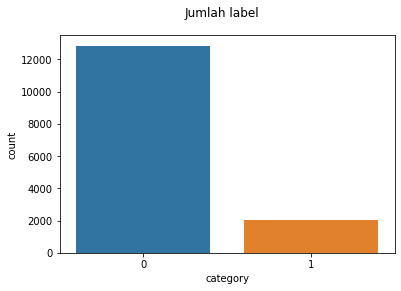

In [6]:
sns.countplot(data=df, x="category")
plt.suptitle("Jumlah label")
plt.show()

## 4.0 Praproses Teks

In [7]:
def text_preprocessing(text):
    text = text.lower()
    table = text.maketrans("", "", string.punctuation)
    text = text.translate(table)
    
    # Stemmer tidak digunakan karena prosesnya memakan
    # waktu lama untuk 15 ribuan data.  Namun teman-teman
    # boleh menggunakannya jika ingin.

    return text

In [8]:
df["preprocessed_text"] = df["review_text"].map(text_preprocessing)

In [9]:
df.head(5)

,review_id,review_text,category,preprocessed_text
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi tidak sampai kamar tidak tersedia heater ...
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau dan seperti sdh j...
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur tidak dibersihkan handuk tidak ...
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,bocor lagi


## 5.0 Representasi Teks

In [10]:
text = df["preprocessed_text"].values
vect = CountVectorizer(stop_words=id_stop) # stopwords removal

# Membuat BoW 
vect.fit(text)
bow = vect.transform(text)

# Atau
bow = vect.fit_transform(text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [11]:
# Jumlah kosakata
len(vect.vocabulary_)

16396

## 6.0 Siapkan Data Input dan Data Output
- Input kita disini adalah: review pelanggan
- Output kita disini adalah: puas (1) atau tidak puas (0)

In [12]:
# X = input data, y = output data
X = bow
y = df["category"].values

## 7.0 Model Machine Learning dan Prediksi

In [13]:
logres = LogisticRegression()
logres.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Akurasi model
logres.score(X, y)

0.9625740441572429

In [15]:
# Prediksi review pelanggan
contoh_review = ["tempatnya kurang nyaman"]
contoh_bow = vect.transform(contoh_review)

# Akan muncul 0 jika sentimen negatif
#      muncul 1 jika sentimen positif

# Jika hasilnya kurang tepat, teman-teman bisa coba
# menggunakan stopwords dalam prosesnya.
logres.predict(contoh_bow)

array([1])

# Menggabungkan Text Representation dan Model ML secara bersamaan
Dari pada kita menerapkan metodenya satu persatu, kita bisa gabungkan saja semua metodenya dalam satu wadah yang berupa **pipeline**.

In [16]:
from sklearn.pipeline import Pipeline

# Pipeline dapat menampung semua metode di sklearn secara berurutan,
# jadi nanti kita tinggal melakukan .fit() satu kali saja
ml_pipe = Pipeline([("representation", CountVectorizer()), 
                    ("logres", LogisticRegression())
                    ])

In [17]:
ml_pipe.fit(text, y)

Pipeline(memory=None,
         steps=[('representation',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logres',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
             

In [19]:
# Kosakata
len(ml_pipe.named_steps["representation"].vocabulary_)

16898

In [20]:
# Akurasi model
ml_pipe.score(text, y)

0.9743537964458805

In [21]:
# Prediksi review pelanggan
contoh_review = ["tempatnya super mantap nyaman"]

ml_pipe.predict(contoh_review)

array([1])

# Penutup
- Aplikasi NLP seperti analisis sentimen termasuk dalam task klasifikasi teks.

- Kalian juga bisa membuat versi lain dari klasifikasi teks seperti misalnya mendeteksi emosi pada teks. Caranya adalah dengan memberi indikasi pada teks (misal 0: netral, 1: senang, 2: sedih)

- Kita bisa menggunakan input-data tweet, status WhatsApp, caption IG, komentar youtube, atau dari open data yang sudah tersedia.

- Atau bahkan kalian bisa buat datanya sendiri.
